# Simulações em Mecânica Estatística:


## Conceitos importantes:

* **Microestado**: conjunto de todas as coordenadas e dos momentos dos constituintes da amostra num dado instante;

* **Macroestado**: Ou estado Termodinâmico, é especificado pelo conjunto de variáveis macroscópicas como pressão, temperatura, número de partículas;

* Para cada **Macroestado** temos uma enormidade de **Microestados**; 

* **Ensemble:** conjunto muito grande ($\mathcal{N}\rightarrow \infty$) de sistemas idênticos do ponto de vista macroscópico. 


* Ensemble canônico:  temperatura, volume e número de particulas fixas

* Um sistema $S$ microscópico está numa temperatura $T$ se está em equilíbrio com um sistema $S_2 \gg S$;

* O microestado $m$ é uma variável aleatória com distribuição de probabilidades dada pela *Distribuição de Boltzmann*:

$$ P(E_m)  =  \frac{\exp\left(-\frac{E_m}{k_B T}\right)}{Z(T)} $$

* Onde $Z(T)$ é a chamada função de partição e é dada por

$$ Z(T) = \sum_{j}^{\mathcal{N}} exp\left(-\frac{E_{\alpha_j}}{k_BT}\right) $$

## Modelo de Ising:


* N dipolos magnéticos fixos numa rede unidimensional

* A partícula no sítio $i$ tem spin $s_i$, que pode ser *Up* ou *Down*
    $$ s_i = s_{z,i} = \pm \frac{1}{2} $$

* Cada configuração das N partículas é descrita por um vetor de estado
    $$|\alpha_j\rangle  = |s_1,s_2,\cdots,s_N\rangle = \left\{ \pm\frac{1}{2}, \pm\frac{1}{2}, \cdots \right\} \\j = 1,\cdots, 2^N $$

* Assumimos que cada dipolo interege com cada um dos seus vizinhos e com um campo externo por meio do potencial
    $$V_i = -J \vec{s}_i \cdot \vec{s}_{i+1} - g \mu_b \vec{s}_i \cdot \vec{B} \\
    \mu_B = \frac{e\hbar}{2 m_e c}$$

* A energia do sistema no estado $|\alpha_k\rangle$ é dada por:
    $$E_{\alpha_k} = \langle \alpha_k|\sum_i V_i|\alpha_k \rangle \\
    = -J \sum_{i=1}^{N-1}s_is_{i+1} - B \mu_b \sum^{N}_{i=1}s_i$$

## Alguns resultados analíticos:

Para cadeias muito grandes pode-se obter algumas variáveis termodinâmicas de forma analítica (Plischke and Bergersen, 1994):

$$
U = \langle E \rangle = - J N\tanh\left( \frac{J}{k_B T} \right)
$$

$$
C(k_BT) = \frac{1}{N} \frac{dU}{dt} = \frac{(J/k_BT)^2}{\cosh^2(J/k_BT)}
$$

$$
\begin{equation}
M(k_BT) = \frac{N e^{J/k_BT}\sinh(B/k_BT)}{\sqrt{e^{2J/k_BT}\sinh^2(B/k_BT) + e^{-2J/k_BT}}}
\end{equation}
$$

## Algoritmo de Metrópolis

1. Comece por um configuração arbitrária $\alpha_k = \{ s_1, s_2,\dots,s_N \}$;

2. Gere uma configuração teste $\alpha_{\text{t}}$:
    1. escollha uma partícula ao acaso, e
    2. mude seu estado de spin

3. Calcule a energia $E_{\alpha_t}$ da config. teste;

4. Se $E_{\alpha_t} \leq E_{\alpha_k}$, aceite o teste e faça $\alpha_{k+1} = \alpha_t$

5. Caso ($E_{\alpha_t} > E_{\alpha_k}$), aceite com *ressalvas*:
    * Calcule $\mathcal{R} = \exp(-\Delta E/k_BT)$
    * Escolha um número aleatório com distribuição uniforme: $$0\leq r_i < 1$$
    * Se $\mathcal{R} \geq r_i \longrightarrow \alpha_{k+1} = \alpha_t $ (aceito)
    * Caso $\mathcal{R} < r_i \longrightarrow \alpha_{k+1} = \alpha_k $ (rejeitado)

## Implementação:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

### Iniciar a cadeia de spins: 

In [6]:
def start_config(N, J = .1, B = 0, μ = .5, cold = False):
    '''
    Retorna uma array contendo os estados de spin inicial;
        * Se cold = True: teremos N spins 'Up' (+1)
        * Se cold = False: array aleatória de "Up's" & "Down's"
    '''
    if cold == True:
        chain_ini = np.ones(N)
        
    else:
        chain_ini =  np.random.randint(-1, high=1, size=N)
        chain_ini += chain_ini + 1
        
    return chain_ini

In [7]:
chain_ini = np.random.randint(-1, high=1, size=20)
print(chain_ini)

chain_ini += chain_ini + 1
print(chain_ini)

[ 0  0 -1 -1 -1  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0]
[ 1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1]


### Calcular a Energia de uma cadeia de spins

In [8]:
def calc_energy(S, J = .1, B = 0, μ = .5):
    '''
    Calcula a energia da cadeia de spins usando o Hamiltoniano do modelo de Ising
        * 'S' = cadeia de spins (array)
    '''
    E = 0
    for i in range(len(S)-1):
        E += - J * S[i]*S[i+1] + μ * S[i] * B
        
    E += μ * S[-1] * B # contabiliza último sítio
    
    return E

### Calcular a variação de energia causada por um 'flip'

In [9]:
def calc_ΔE(S_t, ind, J = .1, B = 0, μ = .5):
    '''
    Calcula a alteração na energia de um 'flip'.
        * 'S_t' cadeia de spins a ser testada
    '''
    i_0 = ind - 1
    i_2 = ind + 1

    if ind == 0:
        ΔE = 2 * S_t[ind] * (-J * S_t[i_2] - μ*B)
    elif ind == len(S_t) - 1:
        ΔE = 2 * S_t[ind] * (-J * S_t[i_0] - μ*B)
    else:
        ΔE = 2 * S_t[ind] * (-J * (S_t[i_2] + S_t[i_0]) - μ*B)
    return ΔE

### Aceitar (ou não) o estado 'flipado'

In [10]:
def decide(S_t, ind, T):
    '''
    Função para decidir se o estado de teste ('flipado') será aceito,
    ou não, como novo estado para a cadeia de spins.
    '''
    Delta_E = calc_ΔE(S_t, ind)
    if Delta_E <= 0:
        return True
    else:
        # estamos adotando k_B = 1
        R = np.exp(- Delta_E / T)
        rᵢ = random.uniform()
        if rᵢ <= R: 
            return True
        else: 
            return False

### 'Flipar' um spin aleatório (ou não)

In [11]:
def new_config(S_k, T = 0.0001):
    '''
    Nesta função, a cadeia de spins sofre uma transição,
    ou não de acordo com o critério da função 'decide'.
    
    T = é a temperatura do banho térmico em contato com a cadeia
    '''
    # Escolhe um sítio:
    ind = random.randint(0, len(S_k))

    # Config. teste:
    S_k[ind] *= -1 # flip

    # Decisão:
    decision = decide(S_k, ind, T)
    if decision == False:
        S_k[ind] *= -1
    return S_k

### Calcular energia média (amostragem espaçada)

In [12]:
def energy_media_T(alpha, N, M_rounds, T):

    E_acumulada = 0
    for i in range(M_rounds * N):
        alpha = new_config(alpha,T = T)
        if i % N == (N-1):
            E_acumulada += calc_energy(alpha)

    return E_acumulada / M_rounds

## O que esperar?

$$
U = \langle E \rangle = - J N\tanh\left( \frac{J}{k_B T} \right)
$$

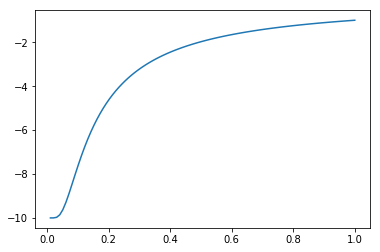

In [13]:
N = 100
m = 200
J = .1

T_array = np.linspace(0,1,100)[1:]
E_analitico = -J * N * np.tanh(J/T_array)
    
plt.plot(T_array, E_analitico)
plt.show()

### Comparar numérico e analítico:

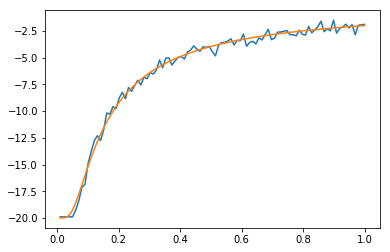

In [2]:
'''
Coloquei todas as funções num arquivo '.py', no final desse mesmo
arquivo escrevi o código 'main' e chamei usando a magic function "run"  
'''
%run metropolis_ising_model_1D.py

## Como os spin estão se comportando?

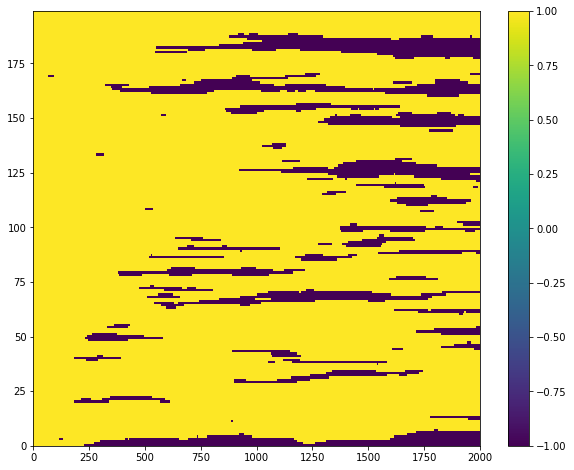

In [5]:
'''
Queremos 2000 'swaps'.
'''
N = 200
steps = 2000

y = np.array(range(N))      # número de spins na cadeia
x = np.array(range(steps))  # tentaivas de 'flip'
x, y = np.meshgrid(x, y)    # rede para o 'plot'

z = np.ones((N,steps))
alpha = start_config(N, cold=True)

for i in range(z.shape[1]):
    z[:,i] = alpha
    alpha = new_config(alpha,T=0.125)
    
plt.figure(figsize=(10,8))    
plt.pcolormesh(x,y,z,vmax=1, vmin=-1)
plt.colorbar()
plt.show()

In [9]:
'''
Talvez para analisar as propriedades termodinâmicas seja melhor
usar uma class 'Chain' para facilitar as coisas: 
'''

class Chain:
    def __init__(self, N, J=.1, B = 0, mu = .5, k = 1, cold = True):
        self._N     = N # não alterar depois de iniciado
        self.J      = J
        self.B      = B
        self.mu     = mu
        self.k      = k
        self._chain = self._start_config(cold) # somente new_config pode alterar

    def _start_config(self, cold):
        '''
        Retorna uma array contendo os estados de spin inicial;
            * Se cold = True: teremos N spins 'Up' (+1)
            * Se cold = False: array aleatória de "Up's" & "Down's"
        '''
        N = self._N

        if cold == True:
            chain_ini = np.ones(N)
        else:
            chain_ini = np.random.randint(-1, high=1, size=N)
            chain_ini += chain_ini + 1
        return chain_ini

    def thermalize(self, T, steps = 10):
        '''
        "Termaliza" o sistema de 'N' spins a uma temperatura T.
        Fazemos isso aplicando o algoritmo de Metropolis (steps x N) vezes.
        '''
        N = self._N
        for i in range(steps * N):
            self.new_config(T)

    def calc_energy(self):
        '''
        Calcula a energia da cadeia de spins usando o Hamiltoniano do modelo de Ising
        '''
        μ = self.mu
        J = self.J
        B = self.B
        S = self._chain
        E = 0
        for i in range(len(S)-1):
            E += - J * S[i]*S[i+1] - μ * S[i] * B
        E += μ * S[-1] * B # contabiliza último sítio
        return E

    def _calc_ΔE(self, ind):
        '''
        Calcula a alteração na energia de um 'flip'.
            * Essa função não tem utilidade fora da classe.
            * Somente usar aqui dentro.
        '''
        S_t = self._chain
        J   = self.J
        μ   = self.mu
        B   = self.B

        i_0 = ind - 1
        i_2 = ind + 1

        if ind == 0:
            ΔE = 2 * S_t[ind] * (-J * S_t[i_2] - μ*B)
        elif ind == len(S_t) - 1:
            ΔE = 2 * S_t[ind] * (-J * S_t[i_0] - μ*B)
        else:
            ΔE = 2 * S_t[ind] * (-J * (S_t[i_2] + S_t[i_0]) - μ*B)
        return ΔE

    def calc_magn(self):
        '''
        Calcula a magnetização normalizada pelo tamanho
        da cadeia de spins "N".
        '''
        return np.sum(self._chain)/self._N

    def decide(self, ind, T):

        '''
        Função para decidir se o estado teste ('flipado') é aceito, ou não,
        como novo estado de spins.
        '''
        S_t = self._chain

        # Calcula Energia "atual" E_k:
        Delta_E = self._calc_ΔE(ind)

        if Delta_E <= 0:
            return True
        else:
            R = np.exp(-Delta_E/(self.k * T))
            rᵢ = random.uniform()
            if rᵢ <= R:
                return True
            else:
                return False

    def new_config(self, T):
        '''
        Executa uma 'rodada' do algoritmo de Metropolis.
        '''
        ind = random.randint(0, self._N) # Escolhe um sítio:
        self._chain[ind] *= -1 # flip

        decision = self.decide(ind, T) # Decisão:
        if decision == False:
            self._chain[ind] *= -1

        return None
 

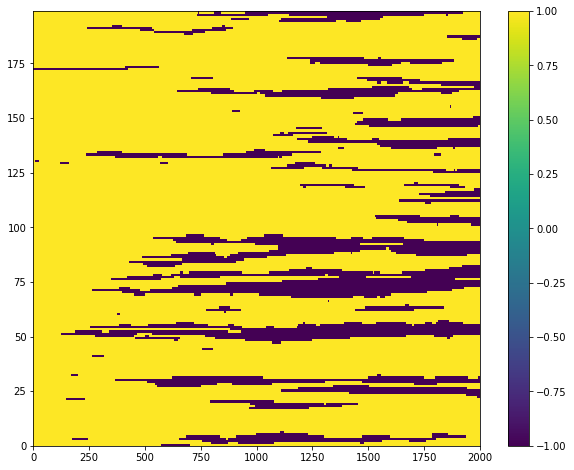

In [18]:
'''
Queremos 100 'swaps'.
'''
N = 200
steps = 2000
Temp = .125
y = np.array(range(N))
x = np.array(range(steps))
x, y = np.meshgrid(x, y)
z = np.ones((N,steps))

ising_chain = Chain(N)
# ising_chain.thermalize(T=Temp)

for i in range(z.shape[1]):
    z[:,i] = ising_chain._chain
    alpha = ising_chain.new_config(Temp)
    
plt.figure(figsize=(10,8))
plt.pcolormesh(x,y,z,vmax=1,vmin=-1)
plt.colorbar()
plt.show()

In [22]:
def average_energy(chain , Temp, N_samples=100):
    '''
    Calcula a média num emsemble em equilíbrio com um
    banho térmico de temperatura 'Temp'.
    'N_samples' é o tamanho da amostra no ensemble.
    '''
    E_vec = np.zeros(N_samples)
    
    for i in range(N_samples):
        E_vec[i] = chain.calc_energy()
        chain.new_config(Temp)
    
    return np.sum(E_vec)/N_samples

def energy_array(ising_chain, T_array):
    '''
    Gera uma array de valores de Energia dado uma cadeia de Ising e 
    uma array contendo os valores de temperatura.
    '''    
    E_array = np.zeros(len(T_array))
    
    for i in range(len(T_array)):
        ising_chain.thermalize( T = T_array[i], steps = 5)
        E_array[i] =  average_energy(ising_chain, Temp = T_array[i], N_samples=200)
    
    return E_array


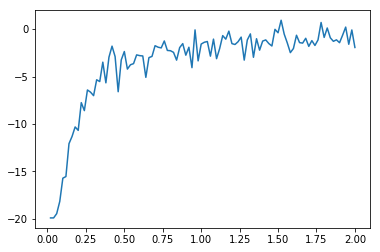

In [23]:
T_array = np.linspace(0,2,101)[1:]

N = 200
ising_chain = Chain(N)

E_array = energy_array(ising_chain, T_array)

plt.plot(T_array, E_array)
plt.show()

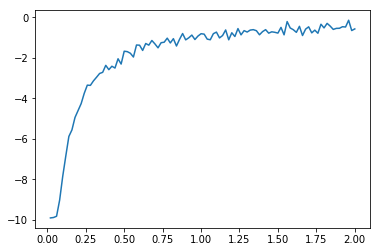

In [24]:
'''
Queremos diminuir a flutuação presente nos resultados 
obtidos para a energia dependente da temperatura. Para isso
vamos executar a simulação 'M' vezes com diferentes "seeds"
e tomar a média ponto à ponto.

'''
T_array = np.linspace(0,2,101)[1:]

N = 100

M_seeds = 10
E_array = np.zeros(len(T_array))

for m in range(M_seeds):
    np.random.seed()
    ising_chain = Chain(N)
    E_array += energy_array(ising_chain, T_array)

E_array = (1/M_seeds) * E_array
np.save('Energy_average_seeds.npy', E_array)

plt.plot(T_array, E_array)
plt.show()

## Energia Interna e Calor Específico:

A energia interna de uma amostra é definida como a média de ensemble das nergias dos microestados,

$$
U \equiv \langle E \rangle = \frac{\sum_m E_m \exp(-E_m/k_BT)}{\sum_{m^\prime} \exp(-E_{m^\prime}/k_BT)}
$$

Pode-se a partir da expressão acima chegar na relação entre energia interna e a derivada logarítmica da função de partição:

$$
U = k_BT^2\frac{\partial \ln Z}{\partial T}
$$

Definimos o calor específico como:

$$
C_V = \frac{\partial U}{\partial T}
$$

que, por sua vez está relacionado com a variância da energia

$$
\sigma^2_E = \langle E^2 \rangle - \langle E \rangle^2
$$

por

$$
C_V = \frac{1}{k_BT^2} \sigma^2_E
$$

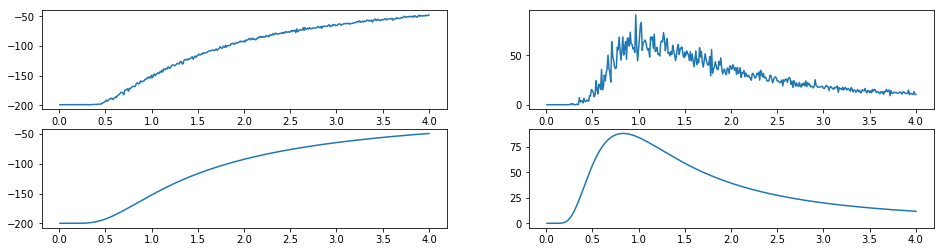

In [8]:
run metropolis_ising_model_1D_oop.py

# Fim

In [9]:
A = np.array([1,2,3])
A += A
A = (1/10) * A

B = np.array([1,2,3])

In [4]:
N = 3
M = 2
Test = np.zeros((N,M))
Test[1,0] = 71
Test

array([[ 0.,  0.],
       [71.,  0.],
       [ 0.,  0.]])

In [15]:
def test():
    return A, B
C, D = test()
D

array([6, 2, 3])

In [28]:
ind = int(input("Digite um int: "))
r = ind % len(chain_ini)
print(chain_ini[r])

list(range(5))

p = 0
N = 5
m = 12
for i in range(m*N):
    if i % N == (N-1):
        p +=1
        print("i: %i , p: %i" % (i, p))

Digite um int: 22
1


In [17]:
z_test = np.ones([3,2])

for z_c in z_test[1,:]:
    print(z_c)
    
list(range(z.shape[1]))

1.0
1.0


[0, 1]

# Modelo de Ising Bidimensional:

seeds: 4
rounds_metr: 10
steps_therm: 10


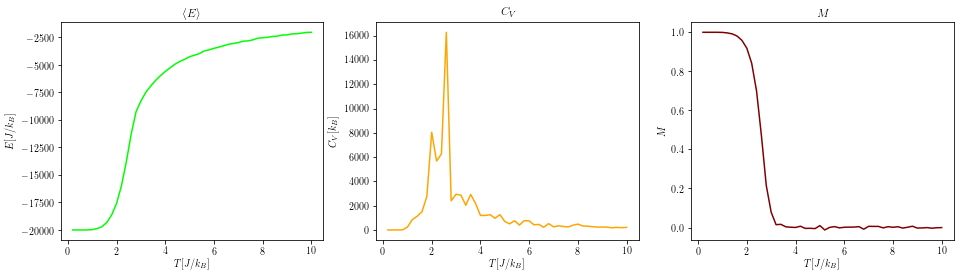

In [14]:
run metropolis_ising_model_2D.py

seeds: 10
rounds_metr: 4
steps_therm: 4


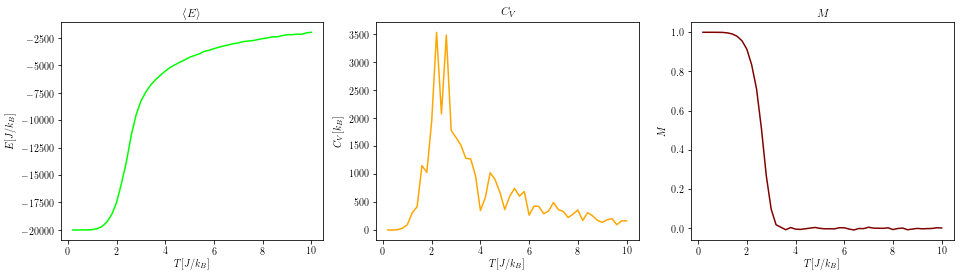

In [15]:
run metropolis_ising_model_2D.py

seeds: 10
rounds_metr: 10
steps_therm: 10


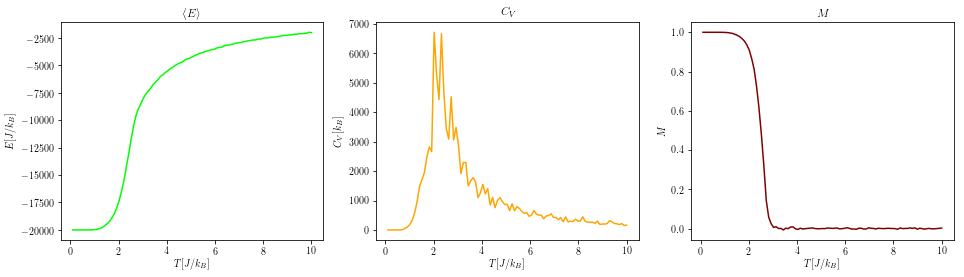

In [16]:
run metropolis_ising_model_2D.py